In [2]:
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return np.sin(np.sqrt(2) * x) * np.sin(2 * x)

In [4]:
num_points = 10000
x_min, x_max = - np.pi, 3 * np.pi
x = np.linspace(x_min, x_max, num_points)

In [5]:
model = Sequential()
model.add(Dense(256, input_dim=1, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))
model.summary()
model.compile(loss='mse', 
              optimizer='nadam',
              metrics=['mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 41,729
Trainable params: 41,729
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x, f(x),
                    batch_size=64, 
                    epochs=200, 
                    verbose=1)

Epoch 1/200
10000/10000 [==============================] - 1s 75us/step - loss: 0.2006 - mean_absolute_error: 0.3672
Epoch 2/200
10000/10000 [==============================] - 0s 33us/step - loss: 0.1793 - mean_absolute_error: 0.3503
Epoch 3/200
10000/10000 [==============================] - 0s 34us/step - loss: 0.1358 - mean_absolute_error: 0.3188
Epoch 4/200
10000/10000 [==============================] - 0s 34us/step - loss: 0.1233 - mean_absolute_error: 0.3109
Epoch 5/200
10000/10000 [==============================] - 0s 33us/step - loss: 0.1194 - mean_absolute_error: 0.3070
Epoch 6/200
10000/10000 [==============================] - 0s 34us/step - loss: 0.1166 - mean_absolute_error: 0.3038
Epoch 7/200
10000/10000 [==============================] - 0s 35us/step - loss: 0.1126 - mean_absolute_error: 0.2974
Epoch 8/200
10000/10000 [==============================] - 0s 35us/step - loss: 0.1065 - mean_absolute_error: 0.2866
Epoch 9/200
10000/10000 [==============================] - 0s 36

10000/10000 [==============================] - 0s 38us/step - loss: 6.2390e-04 - mean_absolute_error: 0.0188
Epoch 70/200
10000/10000 [==============================] - 0s 35us/step - loss: 5.9302e-04 - mean_absolute_error: 0.0179
Epoch 71/200
10000/10000 [==============================] - 0s 34us/step - loss: 5.0623e-04 - mean_absolute_error: 0.0173
Epoch 72/200
10000/10000 [==============================] - 0s 34us/step - loss: 7.8167e-04 - mean_absolute_error: 0.0204
Epoch 73/200
10000/10000 [==============================] - 0s 34us/step - loss: 3.2613e-04 - mean_absolute_error: 0.0131
Epoch 74/200
10000/10000 [==============================] - 0s 33us/step - loss: 6.5587e-04 - mean_absolute_error: 0.0163
Epoch 75/200
10000/10000 [==============================] - 0s 34us/step - loss: 0.0010 - mean_absolute_error: 0.0224
Epoch 76/200
10000/10000 [==============================] - 0s 34us/step - loss: 1.7763e-04 - mean_absolute_error: 0.0103
Epoch 77/200
10000/10000 [===============

Epoch 136/200
10000/10000 [==============================] - 0s 36us/step - loss: 1.3791e-04 - mean_absolute_error: 0.0089
Epoch 137/200
10000/10000 [==============================] - 0s 34us/step - loss: 3.7842e-04 - mean_absolute_error: 0.0131
Epoch 138/200
10000/10000 [==============================] - 0s 33us/step - loss: 2.2495e-04 - mean_absolute_error: 0.0109
Epoch 139/200
10000/10000 [==============================] - 0s 34us/step - loss: 3.1132e-04 - mean_absolute_error: 0.0126
Epoch 140/200
10000/10000 [==============================] - 0s 34us/step - loss: 2.3095e-04 - mean_absolute_error: 0.0112
Epoch 141/200
10000/10000 [==============================] - 0s 34us/step - loss: 2.9086e-04 - mean_absolute_error: 0.0122
Epoch 142/200
10000/10000 [==============================] - 0s 34us/step - loss: 3.1436e-04 - mean_absolute_error: 0.0113
Epoch 143/200
10000/10000 [==============================] - 0s 34us/step - loss: 2.2032e-04 - mean_absolute_error: 0.0110
Epoch 144/200
10

<IPython.core.display.Javascript object>


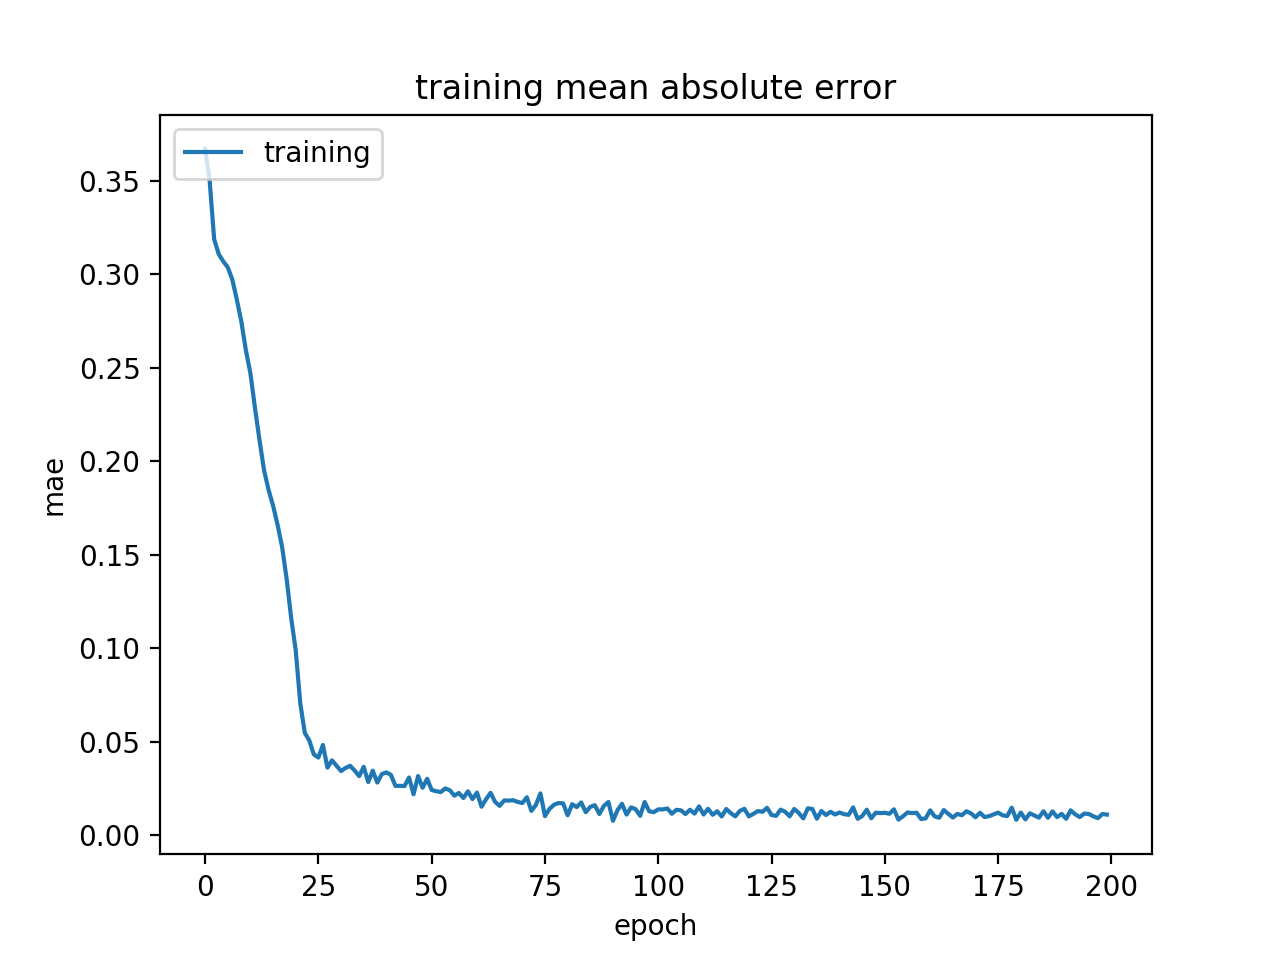

In [9]:
%matplotlib notebook
plt.plot(history.history['mean_absolute_error'])
plt.title('training mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


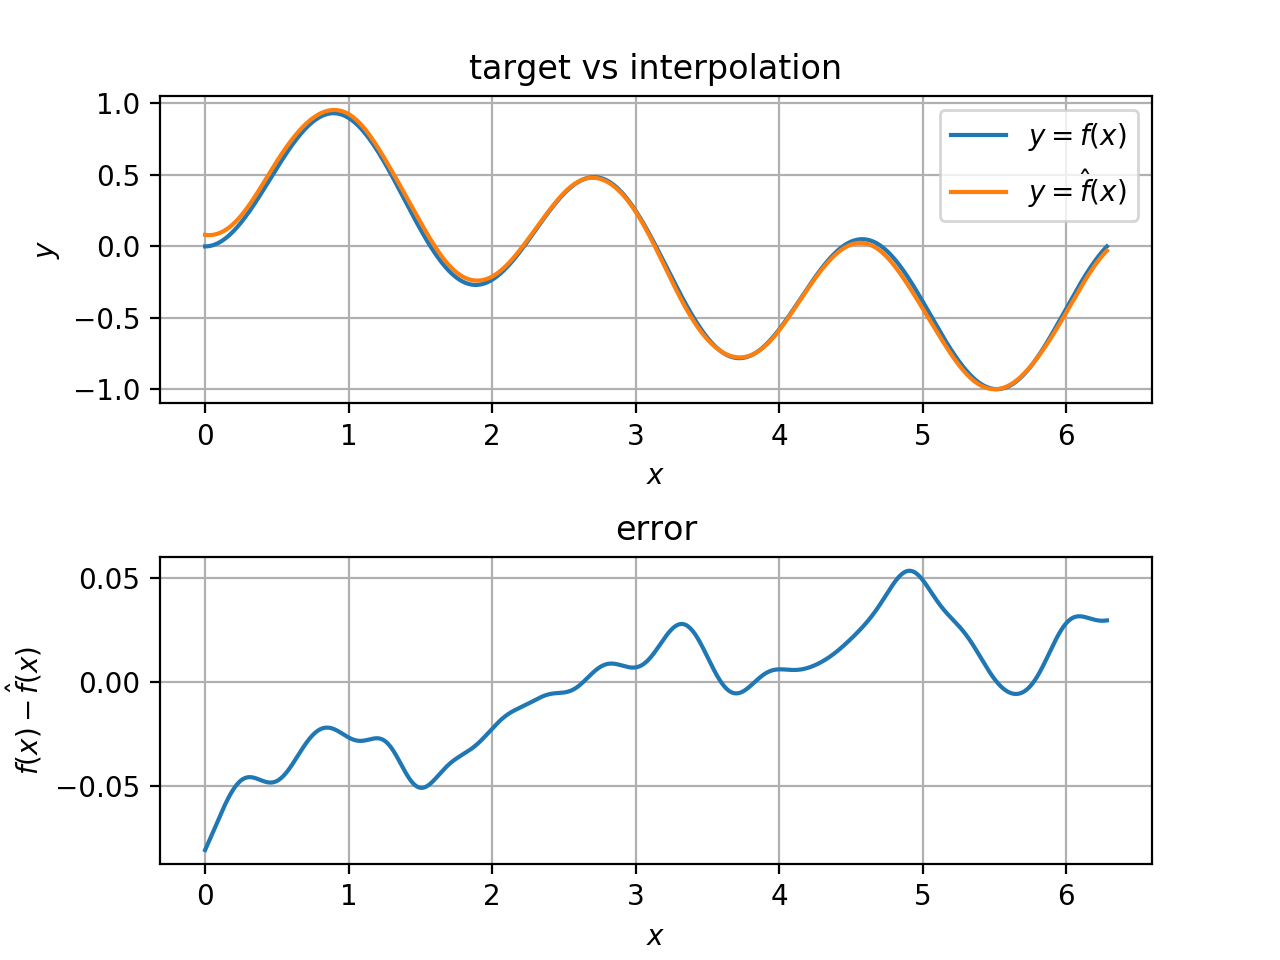

Maximum absolute error = 0.081


In [10]:
x_def = x[np.where((x[:] >= 0) & (x[:] <= 2 * np.pi))]
y_pred = model.predict(x_def).flatten() 
y_true = f(x_def)
error = y_true - y_pred

%matplotlib notebook
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                wspace=0.2, hspace=0.5)

l1, l2 = axs[0].plot(x_def, y_true, x_def, y_pred)
axs[0].set_title('target vs interpolation')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].grid(True)
axs[0].legend((l1, l2), ('$y=f(x)$','$y=\hat{f}(x)$'))


l3 = axs[1].plot(x_def, error)            
axs[1].set_title('error')
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$f(x) - \hat{f}(x)$')    
axs[1].grid(True)

   
plt.show()
print('Maximum absolute error = {:.2}'.format(np.max(np.abs(error))))